In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy.stats import zscore

Reading Country Values

In [2]:
COUNTRY = "togo-dapaong_qc"
df = pd.read_csv(f"../data/{COUNTRY}.csv")
df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

Checking for columns with more than 5% missing values

In [3]:
missing_percent= df.isna().sum()/len(df)*100
threshold = 5
columns_with_high_missing =missing_percent[missing_percent>threshold]
if not columns_with_high_missing.empty:
    for col,percent in columns_with_high_missing.items():
        print(f"{col}: {percent}% missing")
else:
    print("No column has that amount of missing values")

Comments: 100.0% missing


In [4]:
null_percentage = df.isna().mean()*100
null_percentage[null_percentage>5].index.tolist()

['Comments']

## Checking for Outlier and missing values in Key Columns

In [5]:
key_columns = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
for col in key_columns:
    print(f"{col}: {df[col].isna().sum()}")

GHI: 0
DNI: 0
DHI: 0
ModA: 0
ModB: 0
WS: 0
WSgust: 0


GHI: Min: -12.7 Max: 1424.0
DNI: Min: 0.0 Max: 1004.5
DHI: Min: 0.0 Max: 805.7
ModA: Min: 0.0 Max: 1380.0
ModB: Min: 0.0 Max: 1367.0
WS: Min: 0.0 Max: 16.1
WSgust: Min: 0.0 Max: 23.1


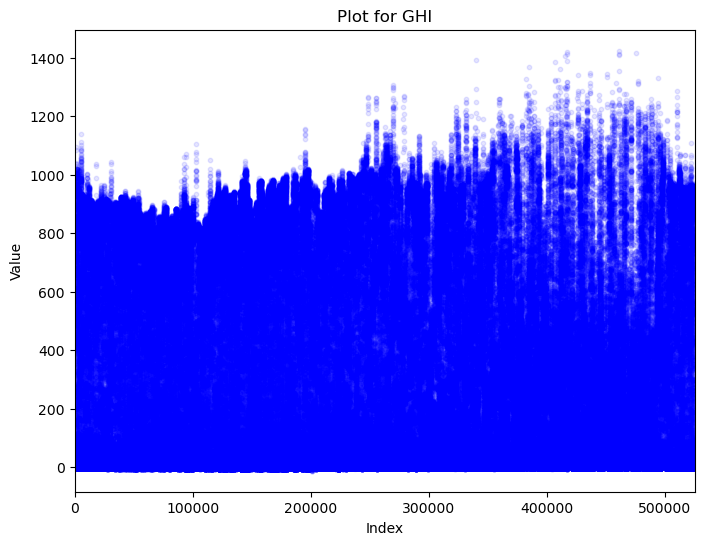

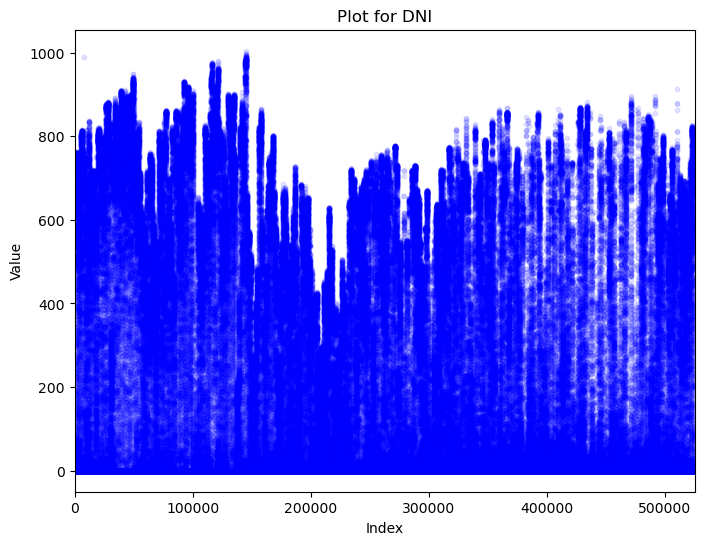

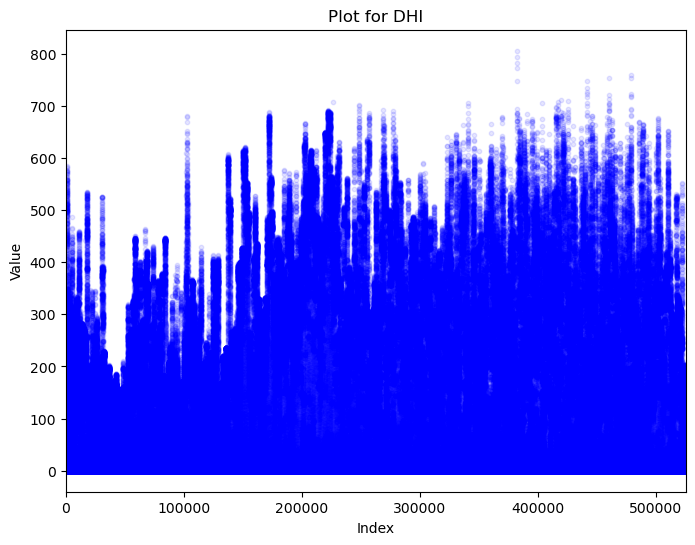

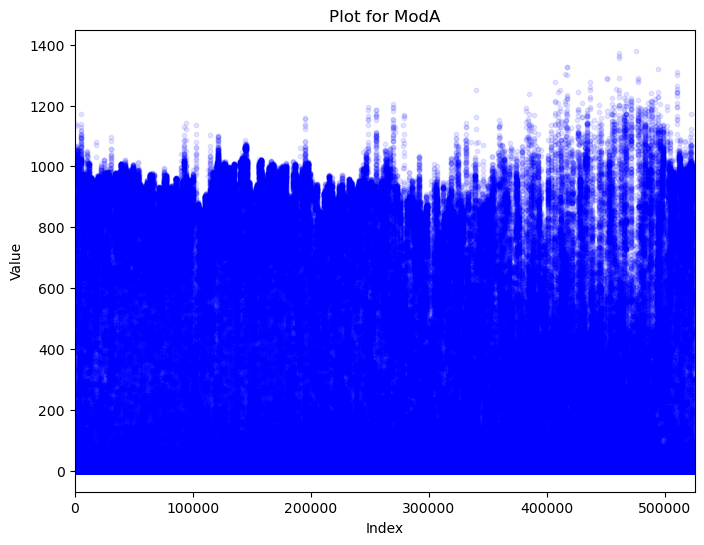

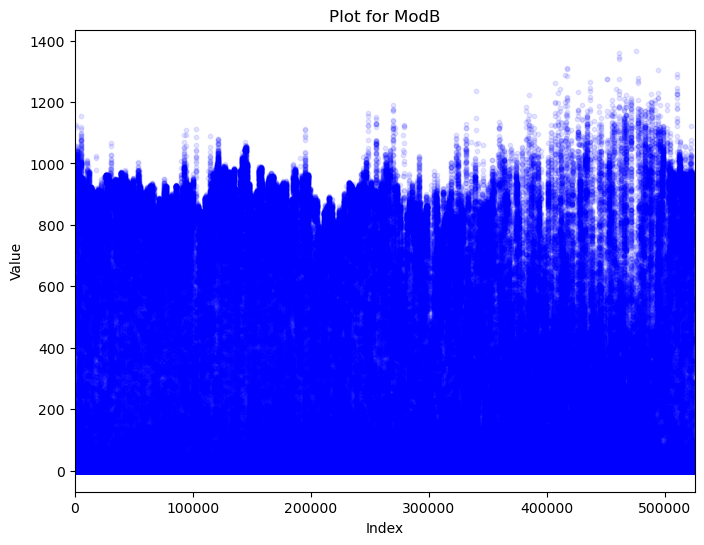

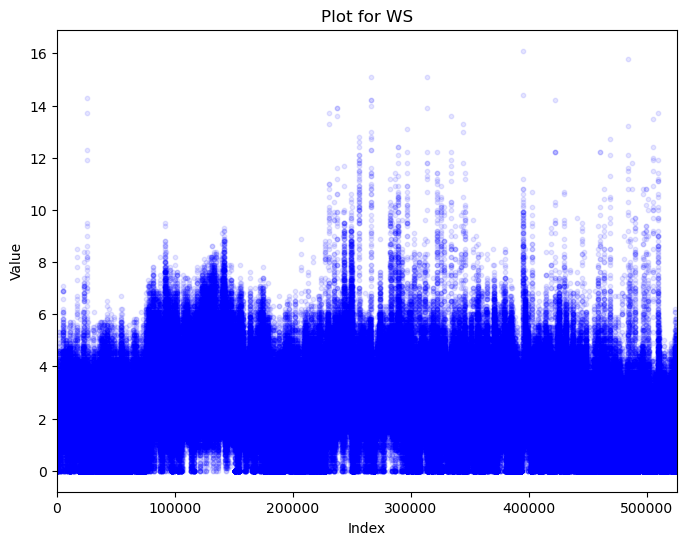

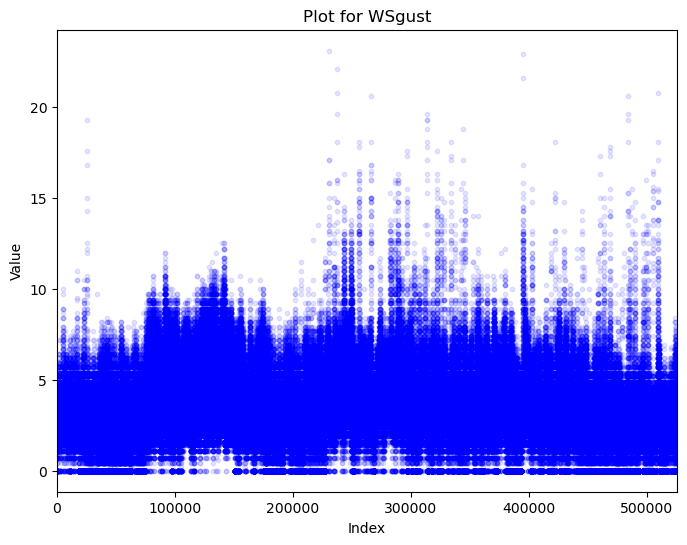

In [6]:
for col in key_columns:
    print(f"{col}: Min: {df[col].min()} Max: {df[col].max()}")
    plt.figure(figsize=(8,6))
    plt.scatter(range(len(df[col].dropna())),df[col].dropna(),alpha=0.1,color="blue",s=10)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title(f"Plot for {col}")
    plt.xlim(0,len(df[col].dropna()))


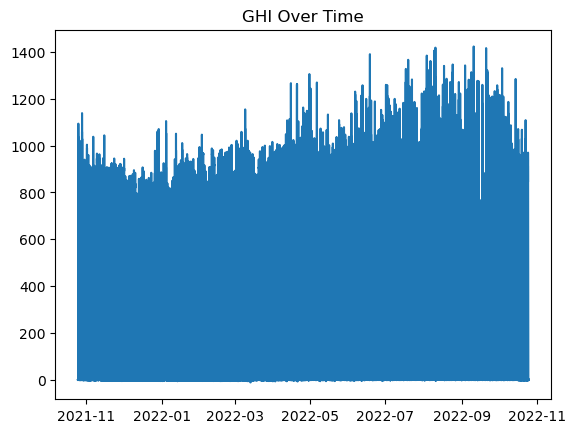

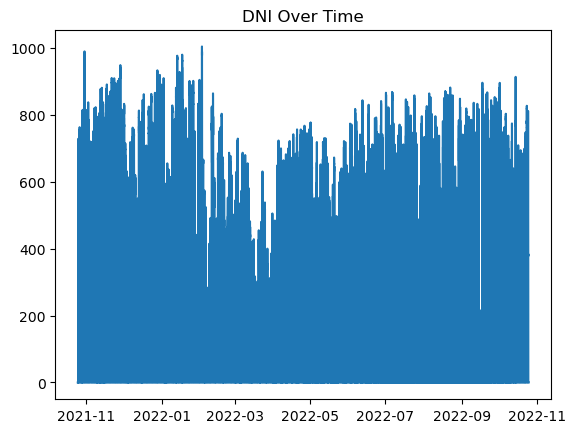

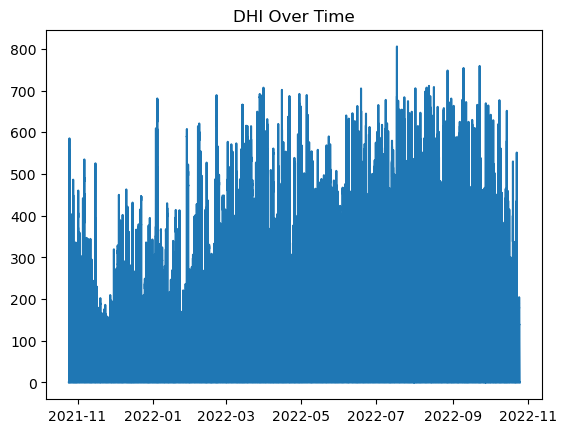

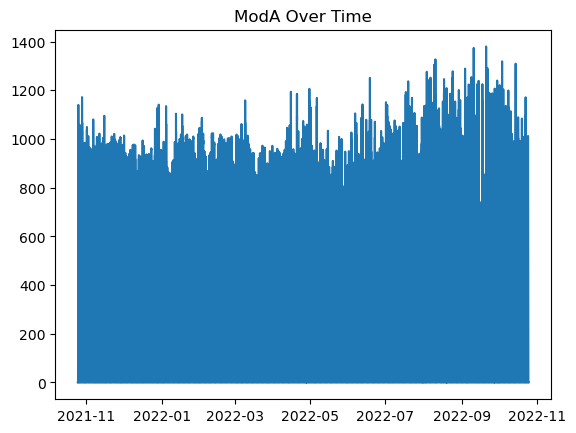

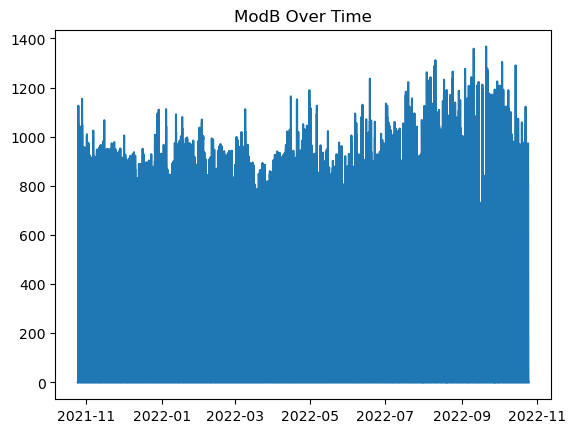

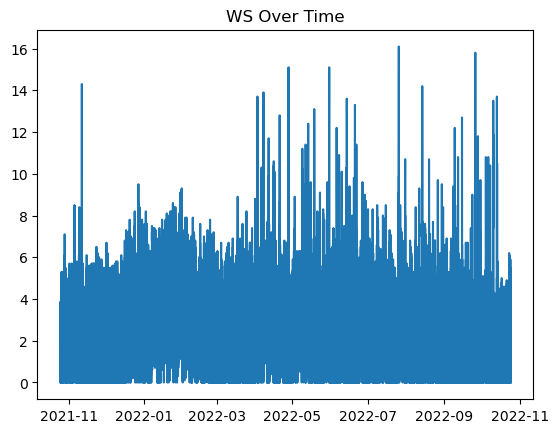

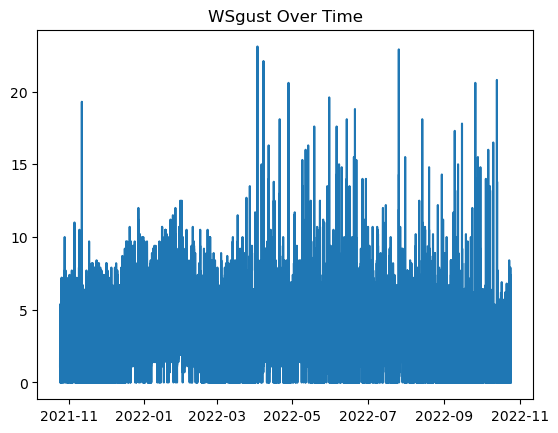

In [7]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
for col in key_columns:
    plt.plot(df["Timestamp"], df[col])
    plt.title(f"{col} Over Time")
    plt.show()

<Axes: >

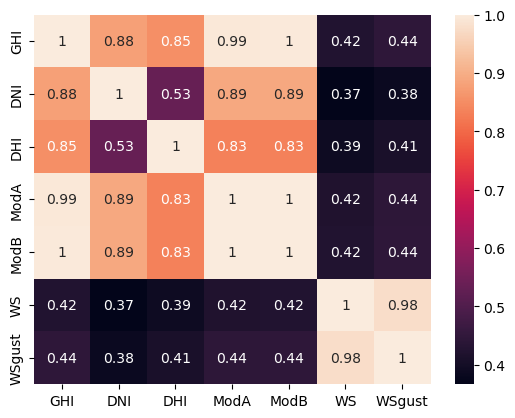

In [8]:
sns.heatmap(df[key_columns].corr(),annot=True)

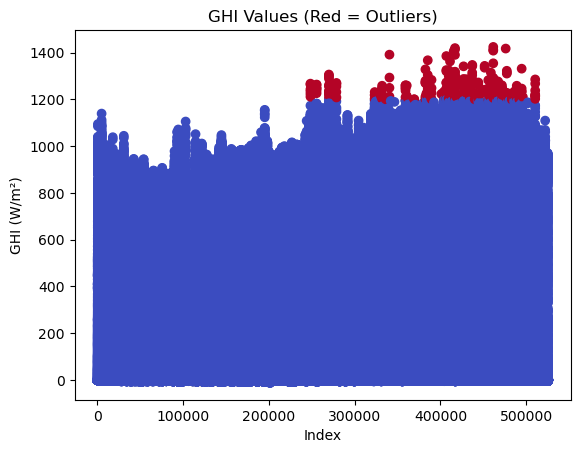

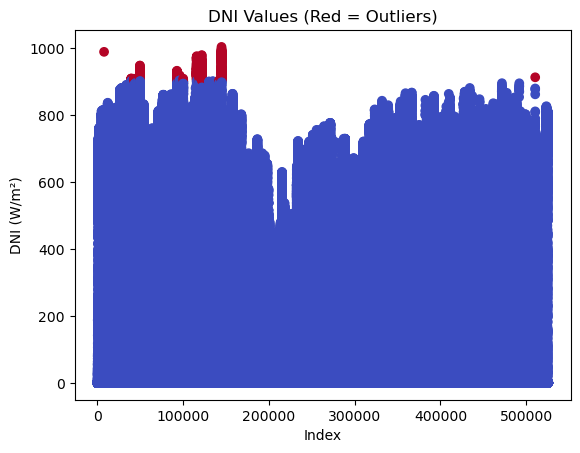

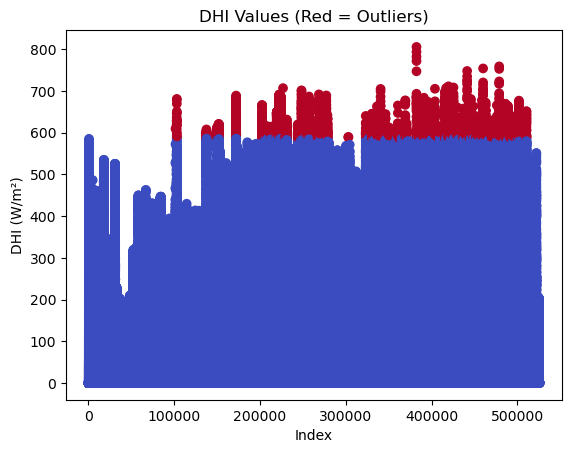

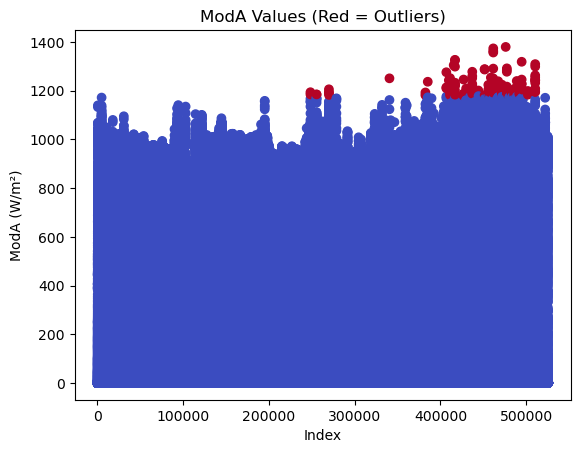

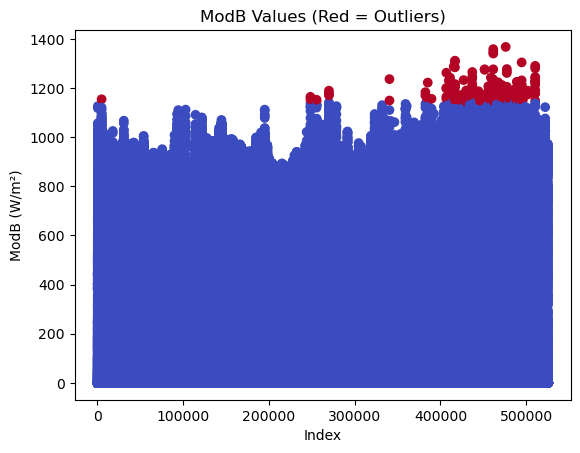

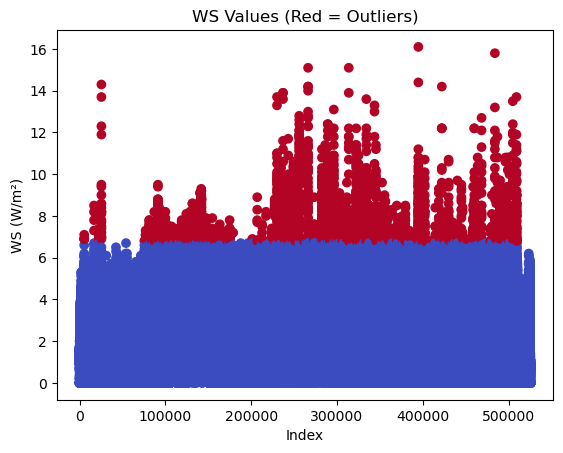

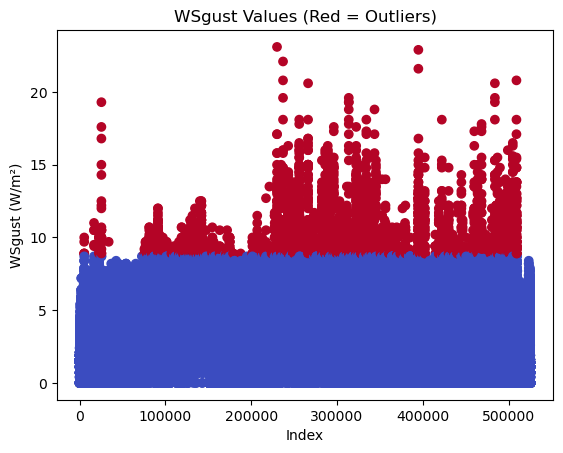

In [9]:
for col in key_columns:
    z = zscore(df[col])
    outliers = np.abs(z) > 3
    plt.scatter(df.index, df[f"{col}"], c=outliers, cmap="coolwarm")
    plt.title(f"{col} Values (Red = Outliers)")
    plt.xlabel("Index")
    plt.ylabel(f"{col} (W/m²)")
    plt.show()

### Computing Z-Score for Key Columns

In [10]:
for col in key_columns:
    df[f"{col}_zscore"] = zscore(df[col])
    df[f"{col}_outlier"] = np.abs(df[f"{col}_zscore"])>3
    

In [11]:
for col in key_columns:
    print(df[f"{col}_outlier"].sum())

305
1062
3415
137
206
3510
3915


In [12]:
mask = np.ones(len(df),dtype=bool)
for col in key_columns:
    mask &= ~df[f"{col}_outlier"].fillna(False)
ndf = df[mask]
for col in key_columns:
    ndf.drop(f"{col}_outlier",axis=1,inplace=True)
    ndf.drop(f"{col}_zscore",axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11552\3850116406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(f"{col}_outlier",axis=1,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11552\3850116406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(f"{col}_zscore",axis=1,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11552\3850116406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(f"{col}

### Filling Missing Values with Median

In [13]:
ndf.fillna(ndf.median())

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596 2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597 2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598 2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
525599 2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          1.1      0.4  227.6      1.1  977         0            0.0   24.7   
1          1.6      0.4  229.3      0.7  977         0            0.0   24.7   
2          1.4      0.3  228.5      2.9  977         0            0.0   24.7   
3          1.6      0.3  229.1      4.6  977         0            0.0   24.7   
4          1.6      0.4  227.5      1.6  977         0            0.0   24.7   
...        ...      ...    ...      ...  ...       ...            ...    ...   
525595     0.0      0.0    0.0      0.0  977         0            0.0   24.3   
525596     0.0      0.0    0.0      0.0  977         0            0.0   24.3   
525597     0.0      0.0    0.0      0.0  977         0            0.0   24.2   
525598     0.0      0.0    0.0      0.0  977         0            0.0   24.1   
525599     0.0      0.0    0.0      0.0  977         0            0.0   24.1   

        TModB  Comments  
0        24.4       NaN  
1        24.4       NaN  
2        24.4       NaN  
3        24.4       NaN  
4        24.4       NaN  
...       ...       ...  
525595   24.0       NaN  
525596   24.0       NaN  
525597   23.9       NaN  
525598   23.8       NaN  
525599   23.8       NaN  

[516349 rows x 19 columns]

### Exporting Cleaned Data

In [14]:
ndf.to_csv(f"../data/{COUNTRY}_clean.csv",mode="a",index=False)

### Analysing the Cleaned data

In [15]:
df = pd.read_csv(f"../data/{COUNTRY}_clean.csv")

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed', errors='coerce')

In [17]:
df.set_index('Timestamp',inplace=True)

In [18]:
variables = ['GHI', 'DNI', 'DHI', 'Tamb']
plt.style.use('seaborn-v0_8')

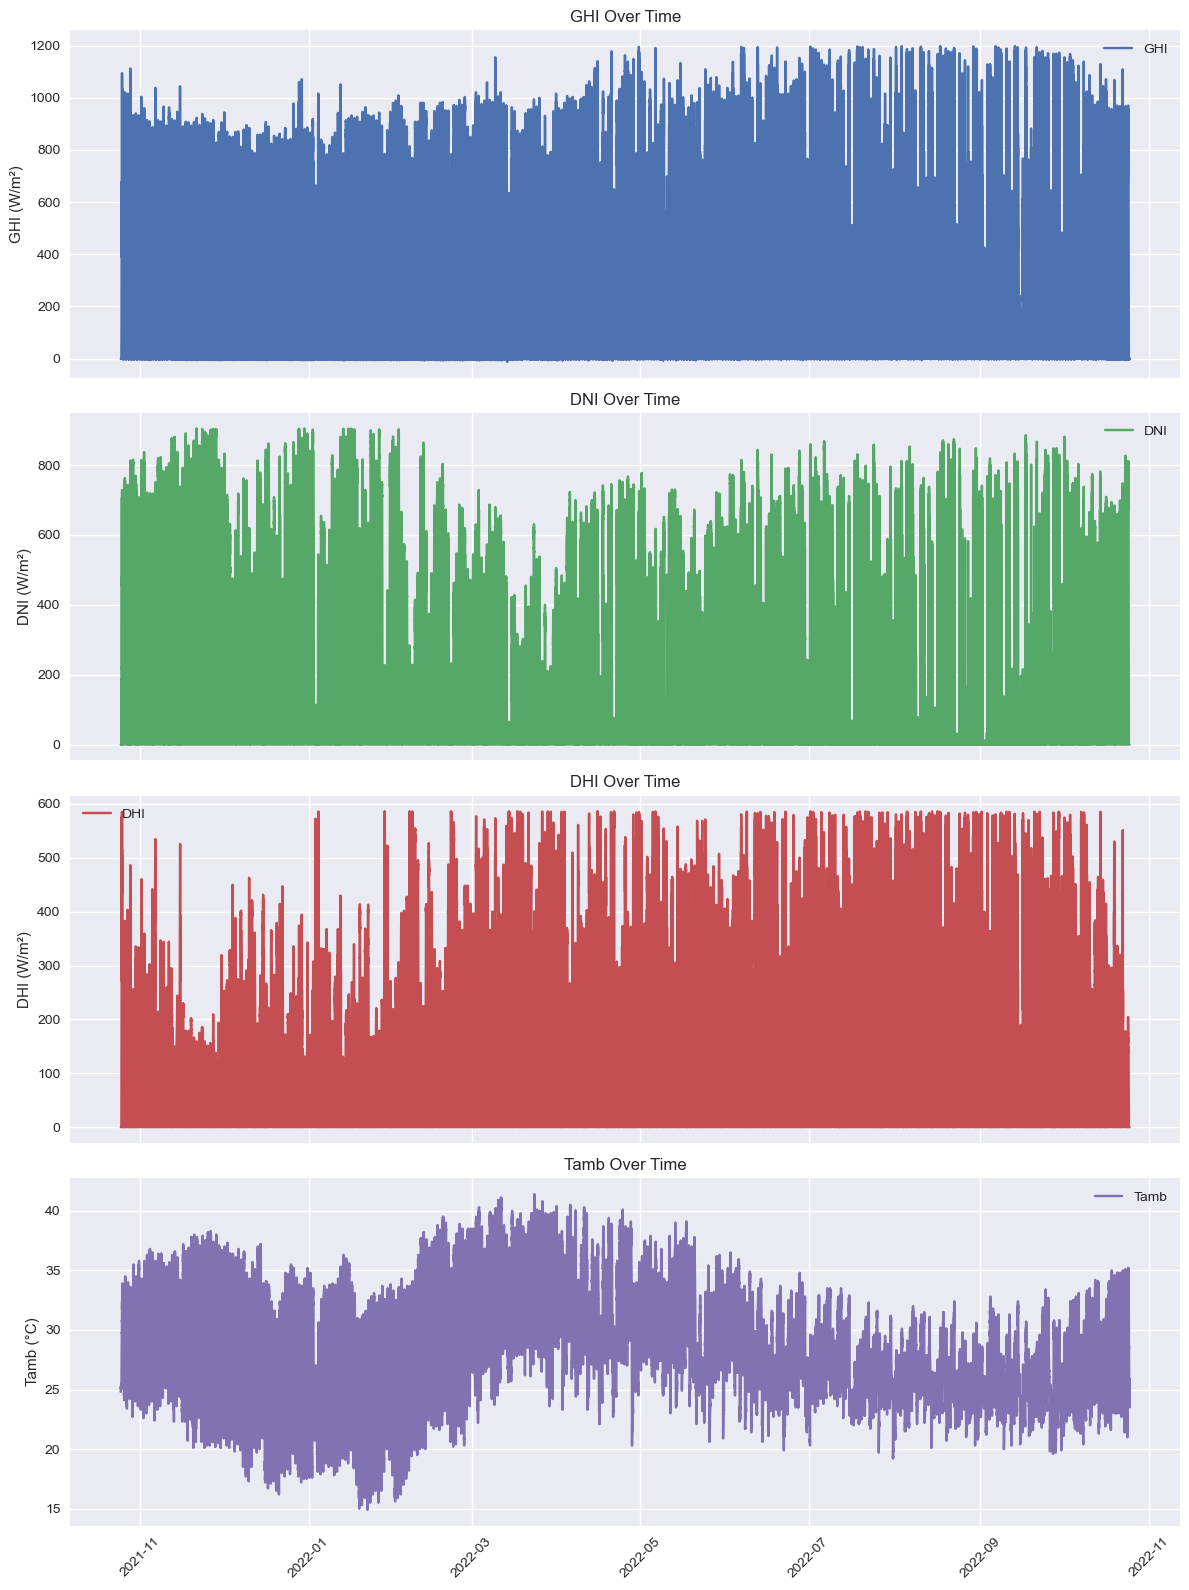

In [19]:
fig, axes = plt.subplots(len(variables), 1, figsize=(12, 4 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    axes[i].plot(ndf['Timestamp'], ndf[var], color=f'C{i}', label=var)
    axes[i].set_title(f'{var} Over Time')
    axes[i].set_ylabel(f'{var} ({"W/m²" if var != "Tamb" else "°C"})')
    axes[i].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

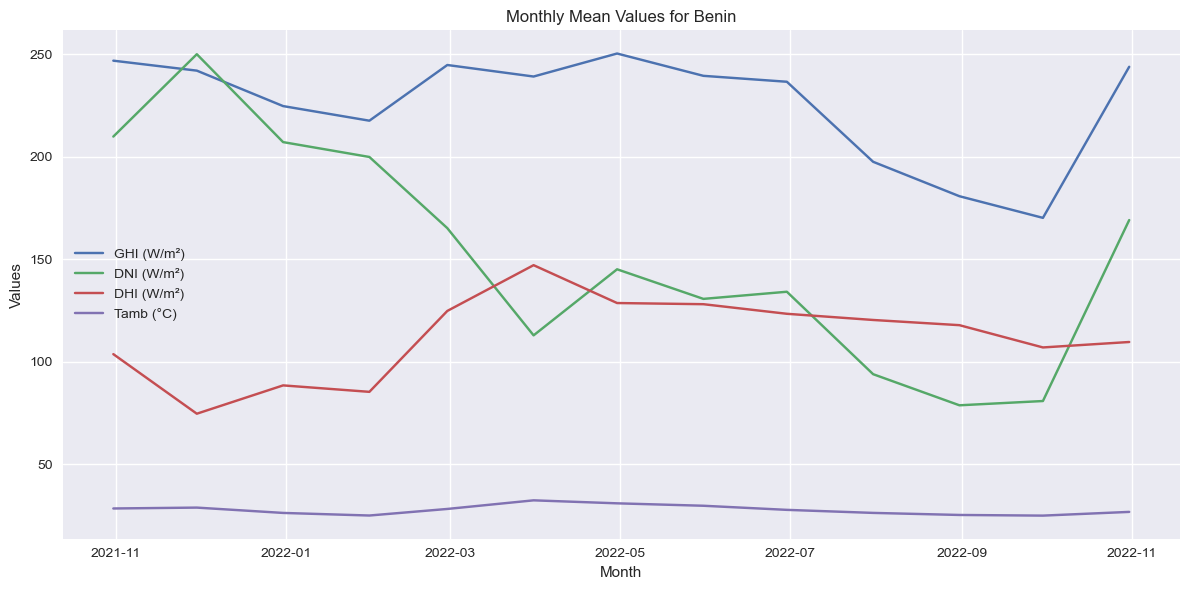

In [20]:
df[variables] = df[variables].apply(pd.to_numeric, errors='coerce')
monthly_means = df[variables].resample('ME').mean()
fig, ax = plt.subplots(figsize=(12, 6))

for var in variables:
    ax.plot(monthly_means.index, monthly_means[var], label=f'{var} ({"W/m²" if var != "Tamb" else "°C"})')

ax.set_title(f'Monthly Mean Values for Benin')
ax.set_ylabel('Values')
ax.set_xlabel('Month')
ax.legend()
plt.tight_layout()

plt.show()

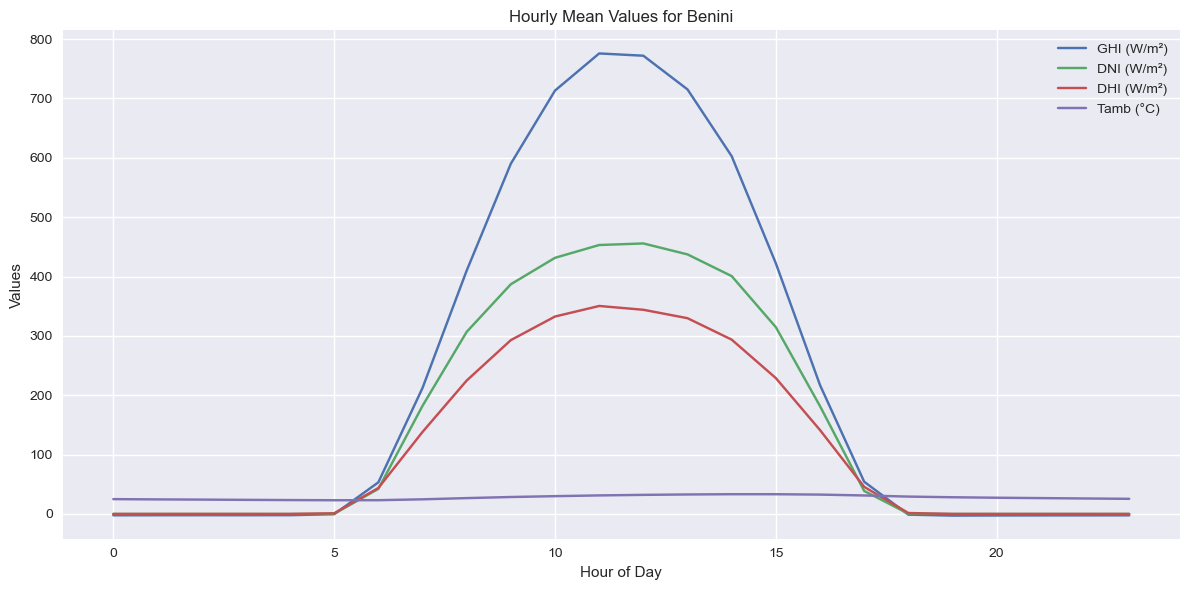

In [21]:
df['Hour'] = df.index.hour

hourly_means = df.groupby('Hour')[variables].mean()

fig, ax = plt.subplots(figsize=(12, 6))

for var in variables:
    ax.plot(hourly_means.index, hourly_means[var], label=f'{var} ({"W/m²" if var != "Tamb" else "°C"})')

ax.set_title(f'Hourly Mean Values for Benini')
ax.set_ylabel('Values')
ax.set_xlabel('Hour of Day')
ax.legend()
plt.tight_layout()

plt.show()

In [22]:
columns_for_clean = ["ModA","ModB"]
df.Cleaning.isin([0,1]).all()

np.True_

In [23]:
df[columns_for_clean] = df[columns_for_clean].apply(pd.to_numeric, errors='coerce')
cleaning_means = df.groupby('Cleaning')[columns_for_clean].mean().reset_index()

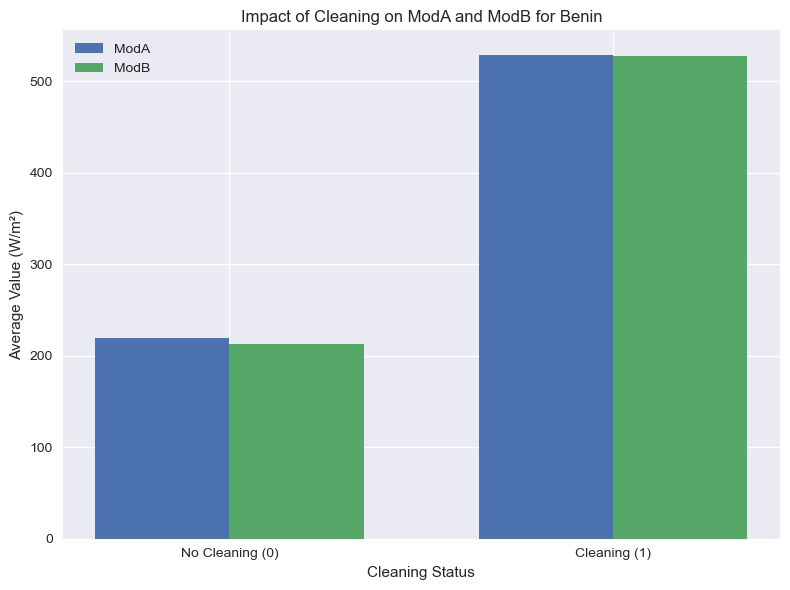

In [24]:
plt.style.use('seaborn-v0_8')

valid_cleaning = cleaning_means[cleaning_means['Cleaning'].isin([0, 1])].copy()
x = range(len(valid_cleaning))

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
for i, var in enumerate(columns_for_clean):
    ax.bar([pos + i * bar_width for pos in x], 
           valid_cleaning[var], 
           bar_width, 
           label=var, 
           color=f'C{i}')

ax.set_xlabel('Cleaning Status')
ax.set_ylabel('Average Value (W/m²)')
ax.set_title(f'Impact of Cleaning on ModA and ModB for Benin')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(['No Cleaning (0)', 'Cleaning (1)'])
ax.legend()
plt.tight_layout()

plt.show()

In [25]:
heatmap_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']  
scatter_vars_x = ['WS', 'WSgust', 'WD', 'RH'] 
scatter_vars_y = ['GHI', 'Tamb', 'GHI']

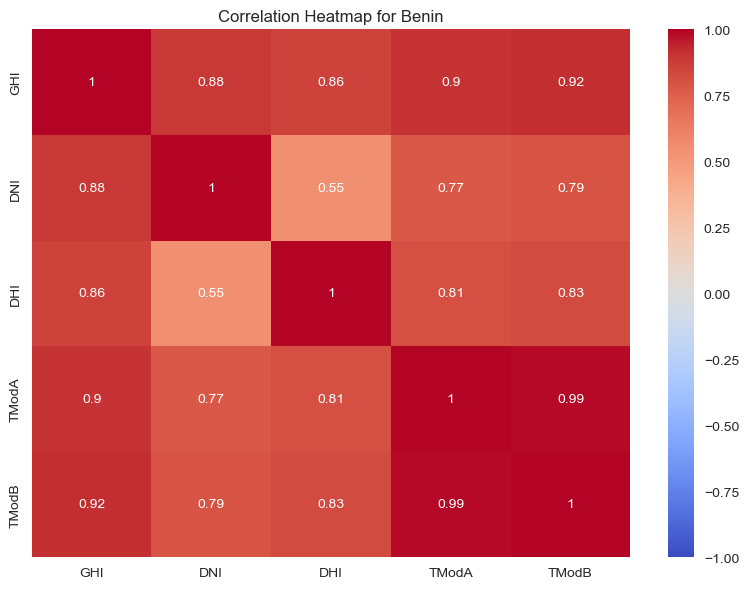

In [26]:
country = 'benin'
df[heatmap_vars] = df[heatmap_vars].apply(pd.to_numeric, errors='coerce')

corr_matrix = df[heatmap_vars].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation Heatmap for {country.capitalize()}')
plt.tight_layout()

plt.show()

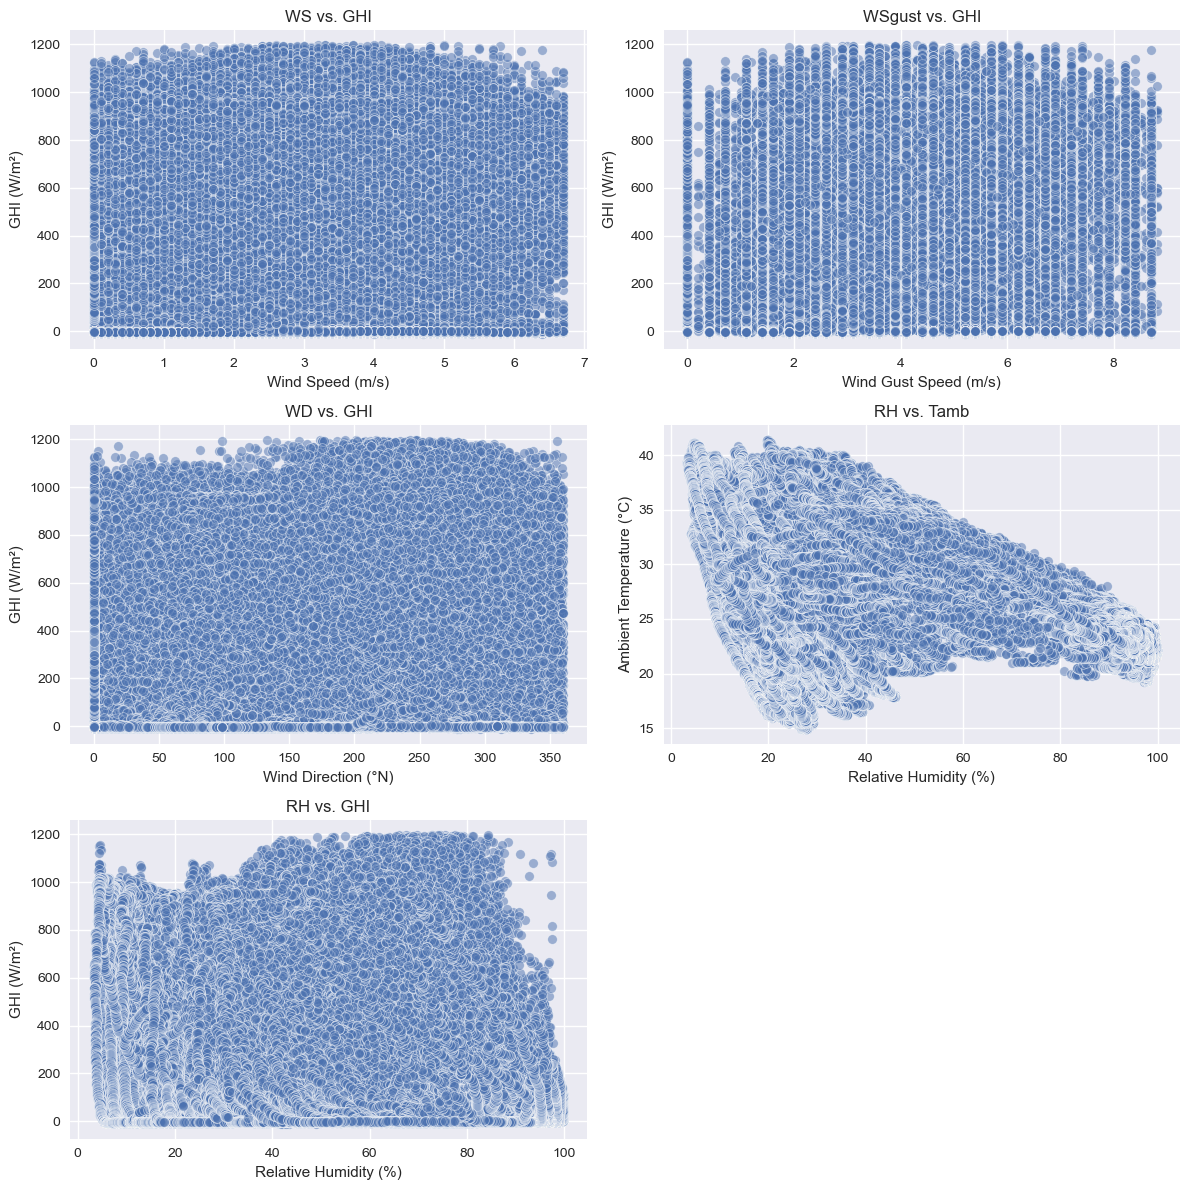

In [27]:
plt.style.use('seaborn-v0_8')

scatter_pairs = [
    ('WS', 'GHI', 'Wind Speed (m/s)', 'GHI (W/m²)'),
    ('WSgust', 'GHI', 'Wind Gust Speed (m/s)', 'GHI (W/m²)'),
    ('WD', 'GHI', 'Wind Direction (°N)', 'GHI (W/m²)'),
    ('RH', 'Tamb', 'Relative Humidity (%)', 'Ambient Temperature (°C)'),
    ('RH', 'GHI', 'Relative Humidity (%)', 'GHI (W/m²)')
]

df_reset = df.reset_index()

for col in ['WS', 'WSgust', 'WD', 'RH', 'GHI', 'Tamb']:
    if col in df_reset.columns:
        df_reset[col] = pd.to_numeric(df_reset[col], errors='coerce')

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (x_var, y_var, x_label, y_label) in enumerate(scatter_pairs):
    sns.scatterplot(data=df_reset, x=x_var, y=y_var, ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].set_title(f'{x_var} vs. {y_var}')

if len(scatter_pairs) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()

plt.show()

### Wind Rose (Radial Bar Plot) for Wind Speed (WS) and Wind Direction (WD)

In [28]:
def wind_rose(ws, wd, bins=16):
    mask = (~ws.isna()) & (~wd.isna())
    ws = ws[mask]
    wd = wd[mask]
    wd_bins = np.linspace(0, 360, bins + 1)
    ws_means = []
    for i in range(bins):
        mask = (wd >= wd_bins[i]) & (wd < wd_bins[i+1])
        ws_means.append(ws[mask].mean())
    angles = np.deg2rad(wd_bins[:-1])
    ws_means.append(ws_means[0])  
    angles = np.append(angles, angles[0])
    ws_means = np.array(ws_means)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, polar=True)
    ax.bar(angles, ws_means, width=2*np.pi/bins, align='edge', color='skyblue', edgecolor='k', alpha=0.7)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title('Wind Rose (Mean Wind Speed by Direction)')
    plt.show()

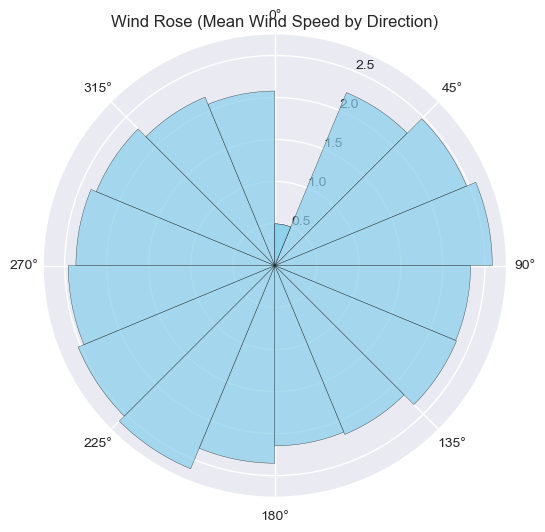

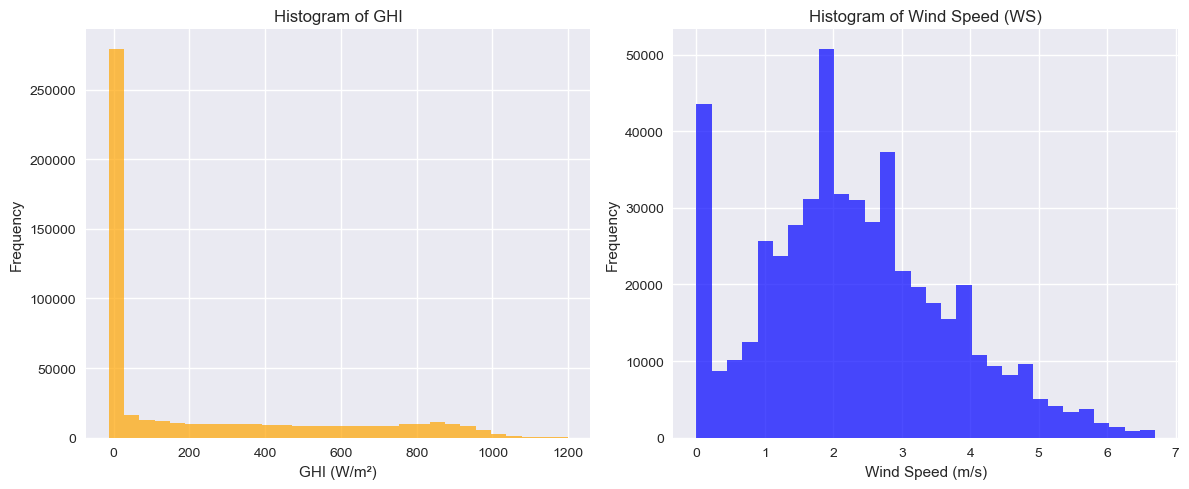

In [29]:

# Convert WS and WD to numeric before plotting
ws_numeric = pd.to_numeric(df['WS'], errors='coerce')
wd_numeric = pd.to_numeric(df['WD'], errors='coerce')

# Run wind rose plot
wind_rose(ws_numeric, wd_numeric)

# Histograms for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(df['GHI'].dropna(), bins=30, color='orange', alpha=0.7)
axes[0].set_title('Histogram of GHI')
axes[0].set_xlabel('GHI (W/m²)')
axes[0].set_ylabel('Frequency')

axes[1].hist(ws_numeric.dropna(), bins=30, color='blue', alpha=0.7)
axes[1].set_title('Histogram of Wind Speed (WS)')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### --- Temperature Analysis: Influence of Relative Humidity (RH) ---

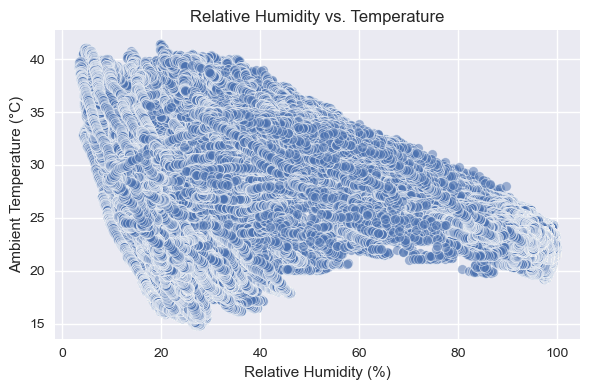

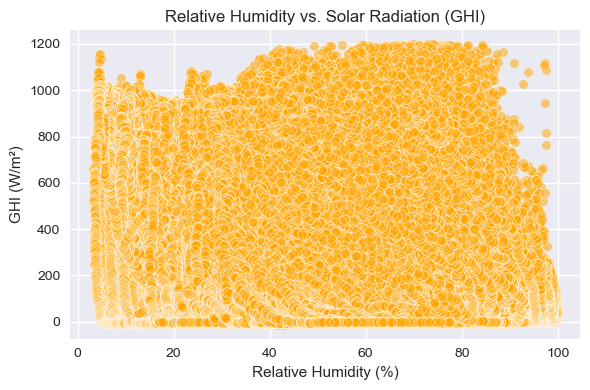

Correlation between RH and Tamb: -0.40
Correlation between RH and GHI: -0.25
Correlation between RH and Tamb: -0.40
Correlation between RH and GHI: -0.25


In [30]:
# Reset index to avoid duplicate label issues before assignment
df_reset = df.reset_index()

# Ensure columns are numeric
df_reset['RH'] = pd.to_numeric(df_reset['RH'], errors='coerce')
# Scatter plot: RH vs. Tamb (Temperature)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='Tamb', data=df_reset, alpha=0.5)
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

# Scatter plot: RH vs. GHI (Solar Radiation)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='GHI', data=df_reset, alpha=0.5, color='orange')
plt.title('Relative Humidity vs. Solar Radiation (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

# Correlation values
corr_rh_tamb = df_reset[['RH', 'Tamb']].corr().iloc[0,1]
corr_rh_ghi = df_reset[['RH', 'GHI']].corr().iloc[0,1]
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")
corr_rh_ghi = df[['RH', 'GHI']].corr().iloc[0,1]
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")

### --- Bubble Chart: GHI vs. Tamb with Bubble Size = RH ---

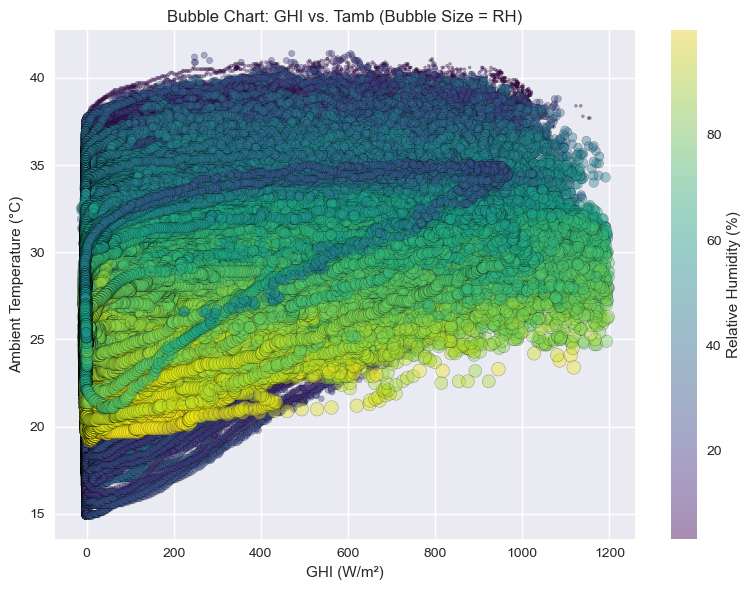

In [31]:
df['GHI'] = pd.to_numeric(df['GHI'], errors='coerce')
df['Tamb'] = pd.to_numeric(df['Tamb'], errors='coerce')
df['RH'] = pd.to_numeric(df['RH'], errors='coerce')

plt.figure(figsize=(8, 6))
plt.scatter(
    df['GHI'], 
    df['Tamb'], 
    s=df['RH'],  # Bubble size by RH
    alpha=0.4, 
    c=df['RH'], 
    cmap='viridis',
    edgecolor='k'
)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.tight_layout()
plt.show()